# F1 algorithm to predict the drivers in the podium and their positions

My name is Gabriela, and I follow F1 since I was around 10 years old. I am looking for an algorithm that helps me predict who will win the race several laps before it ends. This is a project in continuous progress as I am testing different algorithms to find the one that is closer to help me make my predictions

It is difficult, I know! :O
There are a lot of factors that influence who wins a race in F1. Some of them can be predicted easily but some of them cannot.

If you have a suggestion or an idea, please feel free to let me know ;)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media.giphy.com/media/TgHQOqCqf9GH6/giphy.gif")

###  I. Importing data

In [2]:
#The data stored in this path is obtained from the API of https://ergast.com/mrd/. It is continuously updated.
#To update this data please run the file "API_Requests_Results_Qualifying_Laps_PitStops.py"

import pandas as pd
import numpy as np

path = 'C:/Users/gabri/Dropbox/Gaby/Proyectos/My_Portafolio/F1/Data/'

ResultsDF=pd.read_csv(path+"ResultsDF.csv")
QualifyingDF=pd.read_csv(path+"QualifyingDF.csv")
LapsDF=pd.read_csv(path+"LapsDF.csv")
PitsDF=pd.read_csv(path+"PitsDF.csv")

C:\Users\gabri\AppData\Local\Temp\ipykernel_25480\1711198459.py:11: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  LapsDF=pd.read_csv(path+"LapsDF.csv")


In [3]:
np.random.seed(1994) #random seed

In [4]:
ResultsDF.info()
#ResultsDF.head(21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     7691 non-null   int64  
 1   number                         7691 non-null   int64  
 2   position                       7691 non-null   int64  
 3   positionText                   7691 non-null   object 
 4   points                         7691 non-null   float64
 5   grid                           7691 non-null   int64  
 6   laps                           7691 non-null   int64  
 7   status                         7691 non-null   object 
 8   Driver.driverId                7691 non-null   object 
 9   Driver.code                    7508 non-null   object 
 10  Driver.url                     7691 non-null   object 
 11  Driver.givenName               7691 non-null   object 
 12  Driver.familyName              7691 non-null   o

In [5]:
LapsDF.info()
LapsDF.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401273 entries, 0 to 401272
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 401273 non-null  int64  
 1   season                     401273 non-null  int64  
 2   round                      401273 non-null  int64  
 3   raceName                   401273 non-null  object 
 4   date                       401273 non-null  object 
 5   Circuit.circuitId          401273 non-null  object 
 6   Circuit.url                401273 non-null  object 
 7   Circuit.circuitName        401273 non-null  object 
 8   Circuit.Location.lat       401273 non-null  float64
 9   Circuit.Location.long      401273 non-null  float64
 10  Circuit.Location.locality  401273 non-null  object 
 11  Circuit.Location.country   401273 non-null  object 
 12  LapNumber                  401273 non-null  int64  
 13  driverId                   40

,Unnamed: 0,season,round,raceName,date,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country,LapNumber,driverId,position,LapDuration,time
0,0,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,michael_schumacher,1,1:43.478,NaN
1,1,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,barrichello,2,1:45.068,NaN
2,2,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,heidfeld,3,1:50.921,NaN
3,3,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,montoya,4,1:51.388,NaN
4,4,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,frentzen,5,1:52.134,NaN
5,5,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,button,6,1:52.505,NaN
6,6,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,villeneuve,7,1:52.916,NaN
7,7,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,alonso,8,1:53.403,NaN
8,8,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,trulli,9,1:55.163,NaN
9,9,2003,1,Australian Grand Prix,2003-03-09,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia,1,coulthard,10,1:56.961,NaN


In [6]:
PitsDF.info()
#There are no "easy spotted" missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5527 entries, 0 to 5526
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                5527 non-null   int64 
 1   driverId                  5527 non-null   object
 2   lap                       5527 non-null   int64 
 3   stop                      5527 non-null   int64 
 4   time                      5527 non-null   object
 5   duration                  5527 non-null   object
 6   season                    5527 non-null   int64 
 7   round                     5527 non-null   int64 
 8   raceName                  5527 non-null   object
 9   Circuit.circuitId         5527 non-null   object
 10  Circuit.circuitName       5527 non-null   object
 11  Circuit.Location.country  5527 non-null   object
 12  date                      5527 non-null   object
dtypes: int64(5), object(8)
memory usage: 561.5+ KB


### II. Data Preprocessing (Part 1)

##### Creating and transforming some features:

In [7]:
#Turning fastestlap into seconds:
ResultsDF[['FastestLap.Time.timeMIN', 'FastestLap.Time.timeSEC']]=ResultsDF['FastestLap.Time.time'].str.split(":", expand=True)
ResultsDF['FastestLap.Time.time_in_seconds']=ResultsDF['FastestLap.Time.timeMIN'].astype(float)*60+ResultsDF['FastestLap.Time.timeSEC'].astype(float)
ResultsDF=ResultsDF.drop(columns=['FastestLap.Time.timeMIN', 'FastestLap.Time.timeSEC'])

#Creating Season-Round feature:
ResultsDF["Season-Round"]=ResultsDF["season"].astype(str)+"-"+ResultsDF["round"].astype(str)

LapsDF["lap_duration"]=LapsDF["time"].copy()
#Transforming lap_duration into seconds:
LapsDF[['lap_durationMIN', 'lap_durationSEC','nothing']]=LapsDF['lap_duration'].str.split(":", expand=True)
LapsDF['lap_duration_in_seconds']=LapsDF['lap_durationMIN'].astype(float)*60+LapsDF['lap_durationSEC'].astype(float)
LapsDF=LapsDF.drop(columns=['lap_durationMIN', 'lap_durationSEC','nothing'])

#Transforming pits duration into seconds:
PitsDF[['durationSEC','nothing']]=PitsDF['duration'].str.split(":", expand=True)
PitsDF['duration_in_seconds']=PitsDF['durationSEC'].astype(float)
PitsDF=PitsDF.drop(columns=['durationSEC','nothing'])

##### Joining the datasets: Laps+Pits and then adding Results. >>> The result is the dataframe "Laps_Pits_Results".

In [8]:
#Selecting the columns we want to keep from PitsDF
print(PitsDF.columns)
print(LapsDF.columns)

#Renaming certain columns in PitsDF
PitsDF=PitsDF.rename(columns={"lap":'LapNumber',"time":"stop_time","duration_in_seconds":"stop_duration_in_seconds","stop":"stop_number"})

#Features selected to merge with LapsDF
PitsDF[["season","round","driverId","LapNumber","stop_time","stop_duration_in_seconds","stop_number"]].head()

Index(['Unnamed: 0', 'driverId', 'lap', 'stop', 'time', 'duration', 'season',
       'round', 'raceName', 'Circuit.circuitId', 'Circuit.circuitName',
       'Circuit.Location.country', 'date', 'duration_in_seconds'],
      dtype='object')
Index(['Unnamed: 0', 'season', 'round', 'raceName', 'date',
       'Circuit.circuitId', 'Circuit.url', 'Circuit.circuitName',
       'Circuit.Location.lat', 'Circuit.Location.long',
       'Circuit.Location.locality', 'Circuit.Location.country', 'LapNumber',
       'driverId', 'position', 'LapDuration', 'time', 'lap_duration',
       'lap_duration_in_seconds'],
      dtype='object')


,season,round,driverId,LapNumber,stop_time,stop_duration_in_seconds,stop_number
0,2012,1,bruno_senna,1,17:05:23,24.599,1
1,2012,1,ricciardo,1,17:05:35,32.319,1
2,2012,1,massa,11,17:21:08,22.313,1
3,2012,1,rosberg,12,17:22:31,23.203,1
4,2012,1,alonso,13,17:24:04,22.035,1


In [9]:
#Joining the selected features from Pits with LapsDF
Laps_Pits=pd.merge(LapsDF,PitsDF[["season","round","driverId","LapNumber","stop_time","stop_duration_in_seconds","stop_number"]],on=["driverId","season","round","LapNumber"],how="left")

#Verifying that the merger was correctly done
#Laps_Pits[Laps_Pits["season"]>=2012].head(20)

In [10]:
#Checking the the timeframes of data available of laps and pits
print("Pits: \n",PitsDF["season"].describe())
print("Laps: \n",LapsDF["season"].describe())

Pits: 
 count    5527.000000
mean     2016.492853
std         2.941875
min      2012.000000
25%      2014.000000
50%      2016.000000
75%      2019.000000
max      2022.000000
Name: season, dtype: float64
Laps: 
 count    401273.000000
mean       2012.422610
std           5.396117
min        2003.000000
25%        2008.000000
50%        2012.000000
75%        2017.000000
max        2022.000000
Name: season, dtype: float64


In [11]:
#We only have information of the pit stops from 2012, so Laps_Pits will have instances from 2012 or later
Laps_Pits=Laps_Pits[Laps_Pits["season"]>=2012]
Laps_Pits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224758 entries, 176515 to 401272
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 224758 non-null  int64  
 1   season                     224758 non-null  int64  
 2   round                      224758 non-null  int64  
 3   raceName                   224758 non-null  object 
 4   date                       224758 non-null  object 
 5   Circuit.circuitId          224758 non-null  object 
 6   Circuit.url                224758 non-null  object 
 7   Circuit.circuitName        224758 non-null  object 
 8   Circuit.Location.lat       224758 non-null  float64
 9   Circuit.Location.long      224758 non-null  float64
 10  Circuit.Location.locality  224758 non-null  object 
 11  Circuit.Location.country   224758 non-null  object 
 12  LapNumber                  224758 non-null  int64  
 13  driverId                

In [12]:
#Removing features that are not needed
print(Laps_Pits.columns)
print(Laps_Pits["time"].describe()) #time is unique for all the laps in one race, not relevant for this analysis
#'lap_duration' we already have this feature in seconds
Laps_Pits=Laps_Pits.drop(columns=["Unnamed: 0","time",'lap_duration'])
print(Laps_Pits.columns)

Index(['Unnamed: 0', 'season', 'round', 'raceName', 'date',
       'Circuit.circuitId', 'Circuit.url', 'Circuit.circuitName',
       'Circuit.Location.lat', 'Circuit.Location.long',
       'Circuit.Location.locality', 'Circuit.Location.country', 'LapNumber',
       'driverId', 'position', 'LapDuration', 'time', 'lap_duration',
       'lap_duration_in_seconds', 'stop_time', 'stop_duration_in_seconds',
       'stop_number'],
      dtype='object')
count        224758
unique           27
top       12:00:00Z
freq          67218
Name: time, dtype: object
Index(['season', 'round', 'raceName', 'date', 'Circuit.circuitId',
       'Circuit.url', 'Circuit.circuitName', 'Circuit.Location.lat',
       'Circuit.Location.long', 'Circuit.Location.locality',
       'Circuit.Location.country', 'LapNumber', 'driverId', 'position',
       'LapDuration', 'lap_duration_in_seconds', 'stop_time',
       'stop_duration_in_seconds', 'stop_number'],
      dtype='object')


In [13]:
#Circuit, drivers and constructors are encoded

from sklearn.preprocessing import LabelEncoder

circuit_encoder = LabelEncoder()
circuit_encoder.fit(ResultsDF['Circuit.circuitId'])
circuit_values=circuit_encoder.transform(ResultsDF['Circuit.circuitId'])
ResultsDF['Circuit.circuitId_encoded']=circuit_values

constructor_encoder = LabelEncoder()
constructor_encoder.fit(ResultsDF['Constructor.constructorId'])
constructor_values=constructor_encoder.transform(ResultsDF['Constructor.constructorId'])
ResultsDF['Constructor.constructorId_encoded']=constructor_values

driver_encoder = LabelEncoder()
driver_encoder.fit(ResultsDF['Driver.driverId'])
driver_values=driver_encoder.transform(ResultsDF['Driver.driverId'])
ResultsDF['driverId_encoded']=driver_values

In [14]:
#Adding some columns from ResultsDF to Laps_Pits
print(ResultsDF.columns)

SelectedResults=ResultsDF[['position','points', 'grid','laps', 'status', 'Driver.driverId','Driver.nationality','Constructor.constructorId','Constructor.nationality','Season-Round','season', 'round','FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
    'FastestLap.AverageSpeed.units', 'FastestLap.AverageSpeed.speed','driverId_encoded','Constructor.constructorId_encoded','Circuit.circuitId_encoded']][ResultsDF["season"]>=2012]

#Renaming certain columns in SelectedResults
SelectedResults=SelectedResults.rename(columns={"position":'position_final_race',"laps":"laps_total_race","Driver.driverId":"driverId"})

Laps_Pits_Results=pd.merge(Laps_Pits,SelectedResults,on=["driverId","season","round"],how="left")

Laps_Pits_Results.head(21)

Index(['Unnamed: 0', 'number', 'position', 'positionText', 'points', 'grid',
       'laps', 'status', 'Driver.driverId', 'Driver.code', 'Driver.url',
       'Driver.givenName', 'Driver.familyName', 'Driver.dateOfBirth',
       'Driver.nationality', 'Constructor.constructorId', 'Constructor.url',
       'Constructor.name', 'Constructor.nationality', 'Time.millis',
       'Time.time', 'Driver.permanentNumber', 'season', 'round', 'raceName',
       'Circuit.circuitId', 'Circuit.circuitName', 'Circuit.Location.country',
       'date', 'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time',
       'FastestLap.AverageSpeed.units', 'FastestLap.AverageSpeed.speed',
       'FastestLap.Time.time_in_seconds', 'Season-Round',
       'Circuit.circuitId_encoded', 'Constructor.constructorId_encoded',
       'driverId_encoded'],
      dtype='object')


,season,round,raceName,date,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,...,Constructor.nationality,Season-Round,FastestLap.rank,FastestLap.lap,FastestLap.Time.time_in_seconds,FastestLap.AverageSpeed.units,FastestLap.AverageSpeed.speed,driverId_encoded,Constructor.constructorId_encoded,Circuit.circuitId_encoded
0,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,British,2012-1,1.0,56.0,89.187,kph,214.053,15,19,1
1,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,British,2012-1,4.0,57.0,89.538,kph,213.214,34,19,1
2,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,German,2012-1,18.0,4.0,94.021,kph,203.048,60,20,1
3,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,German,2012-1,14.0,53.0,90.931,kph,209.948,82,20,1
4,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,Austrian,2012-1,2.0,57.0,89.417,kph,213.503,97,24,1
5,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,British,2012-1,NaN,NaN,NaN,NaN,NaN,32,15,1
6,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,British,2012-1,5.0,53.0,90.254,kph,211.523,53,33,1
7,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,Italian,2012-1,7.0,52.0,90.277,kph,211.469,4,8,1
8,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,Austrian,2012-1,3.0,57.0,89.438,kph,213.452,99,24,1
9,2012,1,Australian Grand Prix,2012-03-18,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,...,Italian,2012-1,15.0,46.0,91.940,kph,207.644,55,8,1


In [15]:
# #Removing NAN values from 'FastestLap.lap', 'FastestLap.Time.time_in_seconds','FastestLap.AverageSpeed.speed'
# Laps_Pits_Results['FastestLap.lap'].fillna(0,inplace=True)
# Laps_Pits_Results['stop_number'].fillna(0,inplace=True)

In [16]:
Laps_Pits_Results.columns

Index(['season', 'round', 'raceName', 'date', 'Circuit.circuitId',
       'Circuit.url', 'Circuit.circuitName', 'Circuit.Location.lat',
       'Circuit.Location.long', 'Circuit.Location.locality',
       'Circuit.Location.country', 'LapNumber', 'driverId', 'position',
       'LapDuration', 'lap_duration_in_seconds', 'stop_time',
       'stop_duration_in_seconds', 'stop_number', 'position_final_race',
       'points', 'grid', 'laps_total_race', 'status', 'Driver.nationality',
       'Constructor.constructorId', 'Constructor.nationality', 'Season-Round',
       'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
       'FastestLap.AverageSpeed.units', 'FastestLap.AverageSpeed.speed',
       'driverId_encoded', 'Constructor.constructorId_encoded',
       'Circuit.circuitId_encoded'],
      dtype='object')

In [17]:
#Feature created to indicated if the lap is the fastest or not
Laps_Pits_Results['IsFastestLap']=np.where(Laps_Pits_Results['LapNumber'] == Laps_Pits_Results['FastestLap.lap'], 1, 0)


##### Joining Results + some summary information from Pits and Laps >>> Results_Expanded

In [18]:
#Function to create dataframe ResultsExpanded according to percentile chosen:

#it has basic information from the ResultsDF + information about specific laps from LapsDF

def createResultsExpanded(percentile,previous_laps_considered):
    #Copy of laps dataframe
    MLaps=LapsDF[LapsDF["season"]>=2012].copy(deep=True)

    #Selecting the maximum number of laps per race and season that we want to have available before making a prediction
    a=SelectedResults[SelectedResults["status"]=="Finished"][["season","round","laps_total_race"]].copy(deep=True)
    a["laps_considered"]=a["laps_total_race"]*percentile
    a["laps_considered"]=a["laps_considered"].astype(int)
    a=pd.DataFrame({'laps_considered' : a.groupby(["season","round",])["laps_considered"].max()}).reset_index()
    a

    #Selecting the laps that get inside this range
    MLaps=pd.merge(MLaps,a,on=["season","round"],how="left")
    SelectedLaps=MLaps[MLaps['LapNumber'] <= MLaps['laps_considered']] #only the ones equal or before

    #Fastest per driver and per race until that moment
    fastestperdriver=pd.DataFrame({'Fastest_per_driver' : SelectedLaps.groupby(["season","round","driverId"])["lap_duration_in_seconds"].min()}).reset_index()
    fastestperrace=pd.DataFrame({'Fastest_per_race' : SelectedLaps.groupby(["season","round"])["lap_duration_in_seconds"].min()}).reset_index()
    new=pd.merge(fastestperdriver,fastestperrace,on=["season","round"],how="left")
    new=pd.merge(new,a,on=["season","round"],how="left") #adding lap until it is being considered

    #Adding the previous laps and positions we want
    for i in range(1,previous_laps_considered+1):
        lapname='lap_'+str(i)+'_duration_secs'
        positionname='position_'+str(i)
        Lap_m=MLaps[["season","round","driverId","lap_duration_in_seconds","position"]][MLaps['LapNumber'] == (MLaps['laps_considered']-i)]
        new=pd.merge(new,Lap_m,on=["season","round","driverId"],how="left") #adding lap and position
        new=new.rename(columns={"lap_duration_in_seconds":lapname,"position":positionname})

    ResultsExpanded=pd.merge(SelectedResults,new,on=["season","round","driverId"],how="left")
    ResultsExpanded = ResultsExpanded.dropna() #droping rows with na's
    return ResultsExpanded


### III. Premliminar EDA

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#### A. How fast are the cars now?

##### The fastest lap per round (race) from season 2014 to 2021 per driver

In this graph we can see the fastest lap, per race, per driver, and per season. As from 2014 until the present, there have been a lot of drivers racing in F1, the legend show as the nationality of the driver. The label at the bottom of each point from each year also show us the name of the driver who did had the fastest lap of the season.

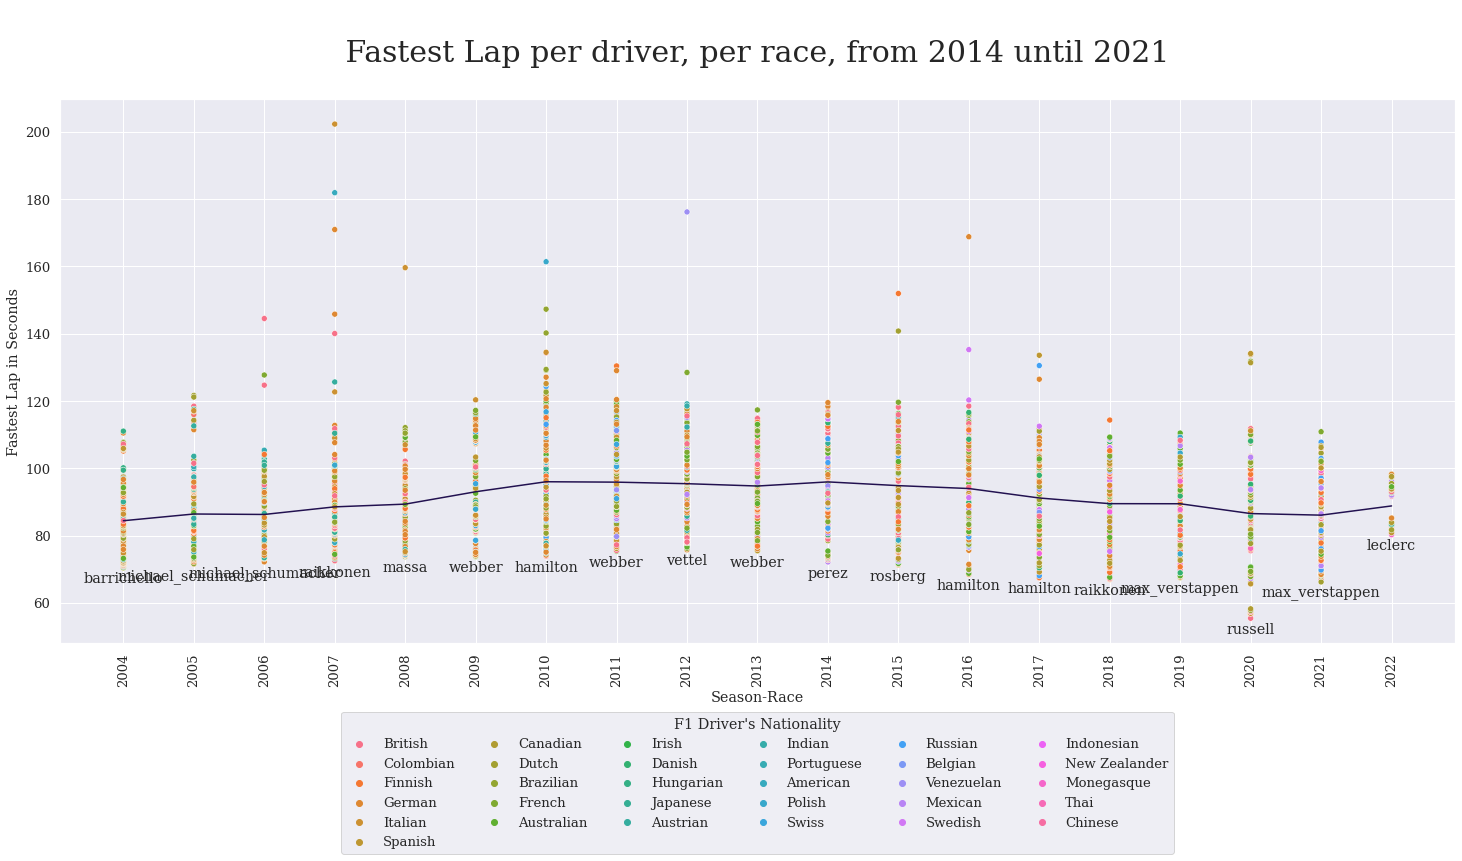

In [20]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")
Years=ResultsDF["season"].unique().tolist() #or seasons for plot

#Fastest lap per driver per season
LABELS=pd.DataFrame(columns=["Driver.driverId","FastestLap.Time.time_in_seconds","season"])
for i in ResultsDF[ResultsDF["season"]>=2004]["season"].unique().tolist():
    A=pd.DataFrame(ResultsDF[ResultsDF["season"]==i].groupby(["Driver.driverId"])["FastestLap.Time.time_in_seconds"].min())
    A["season"]=i
    Selected=A[A["FastestLap.Time.time_in_seconds"]==min(A["FastestLap.Time.time_in_seconds"])].reset_index()
    LABELS=pd.concat([LABELS,Selected])

#Plot
fig, ax = plt.subplots(figsize=(25, 10))
sns.scatterplot(x="season", y="FastestLap.Time.time_in_seconds",hue='Driver.nationality',ci=None,estimator="min",
           data=ResultsDF)
sns.lineplot(x="season", y="FastestLap.Time.time_in_seconds",estimator="mean",ci=None,
           data=ResultsDF)

plt.locator_params(axis="x", nbins = len(Years))
plt.title("\n Fastest Lap per driver, per race, from 2014 until 2021 \n",fontsize=30)
plt.xlabel("Season-Race")
plt.ylabel("Fastest Lap in Seconds")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.4),loc='lower center', title="F1 Driver's Nationality", ncol=6)


#Individual labels of the fastest lap of the season:
for label,y,x in LABELS.to_numpy():
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()



##### Top speed per round from 2014 until 2021 per driver

This plot shows the top speed per race, per driver, per season. It also contains the team of each driver. Hamilton has been the fastest for 7 seasons with Mercedes! It is important to mention that the speed in which cars go depend on the mechanical regulations that the FIA has for each year. We would think that overtime, cars should get faster. Well, that doesn't happen because teams are obliged to satisfy safety and racing mechanical regulations per year.

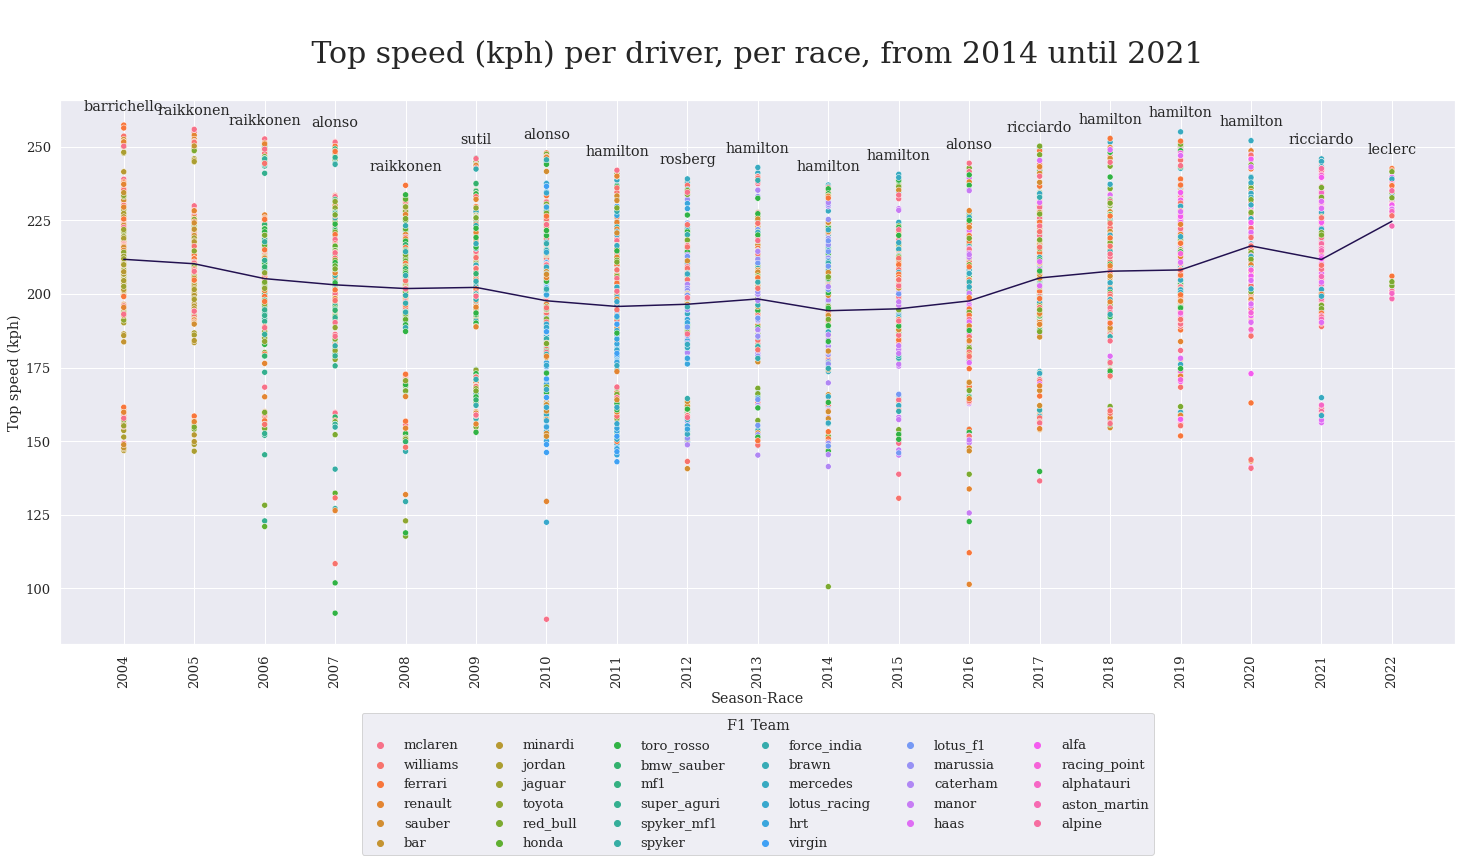

In [21]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")
Years=ResultsDF["season"].unique().tolist() #or seasons for plot

#Top speed per driver per season
LABELS=pd.DataFrame(columns=["Driver.driverId",'FastestLap.AverageSpeed.speed',"season"])
for i in ResultsDF[ResultsDF["season"]>=2004]["season"].unique().tolist():
    A=pd.DataFrame(ResultsDF[ResultsDF["season"]==i].groupby(["Driver.driverId"])['FastestLap.AverageSpeed.speed'].max())
    A["season"]=i
    Selected=A[A['FastestLap.AverageSpeed.speed']==max(A['FastestLap.AverageSpeed.speed'])].reset_index()
    LABELS=pd.concat([LABELS,Selected])

#Plot
fig, ax = plt.subplots(figsize=(25, 10))
sns.scatterplot(x="season", y='FastestLap.AverageSpeed.speed',hue='Constructor.constructorId',ci=None,estimator="max",
           data=ResultsDF)
sns.lineplot(x="season", y='FastestLap.AverageSpeed.speed',estimator="mean",ci=None,
           data=ResultsDF)

plt.locator_params(axis="x", nbins = len(Years))
plt.title("\n Top speed (kph) per driver, per race, from 2014 until 2021 \n",fontsize=30)
plt.xlabel("Season-Race")
plt.ylabel("Top speed (kph)")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.4),loc='lower center', title="F1 Team", ncol=6)


#Individual labels of the fastest lap of the season:
for label,y,x in LABELS.to_numpy():
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()


##### Top speed (kph) comparison per team in the last 10 years

In the last 10 years, the F1 has been dominated by Mercedes and Red Bull. This can be seen in the top speed of their cars. In seasons 2011, 2012, and 2013, Red Bull had the highest average top speeds during the season. However, from 2014 and later, this place was taken by Mercedes (except 2017 where Ferrari took the lead).

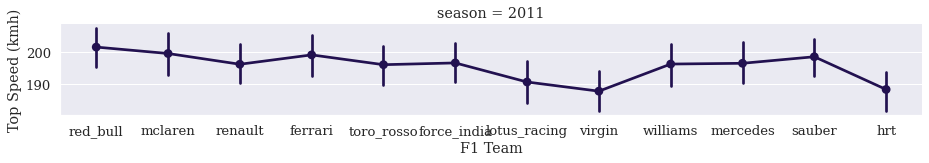

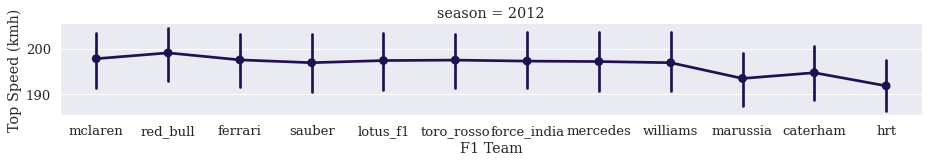

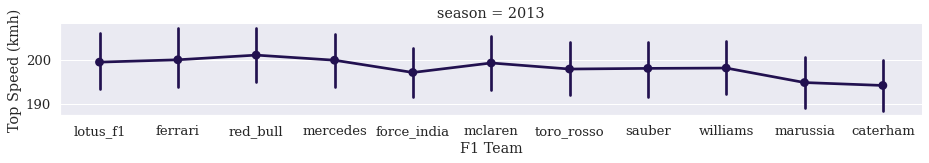

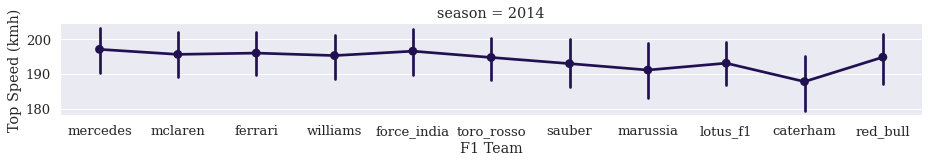

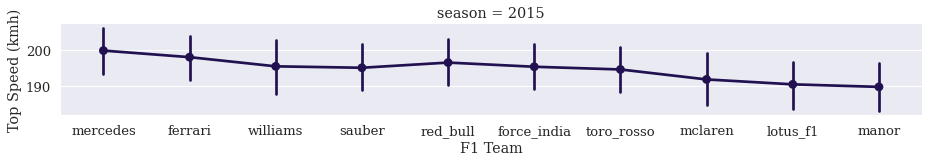

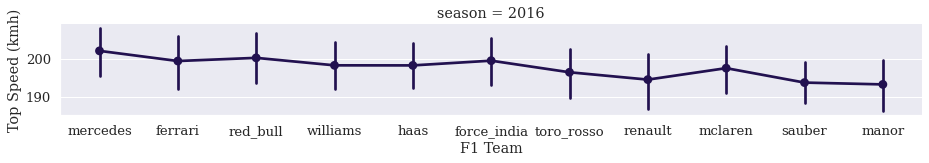

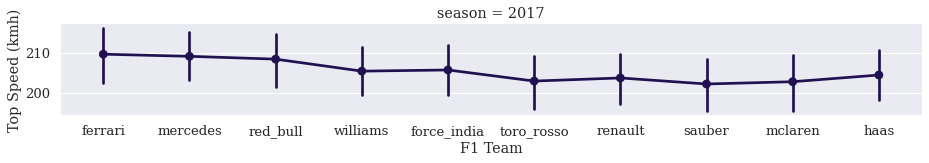

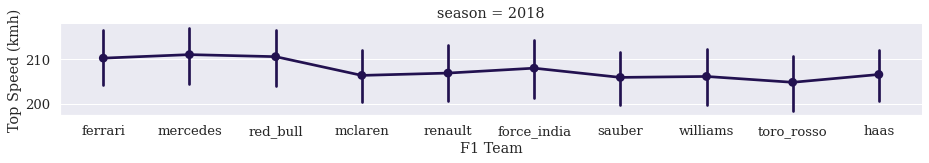

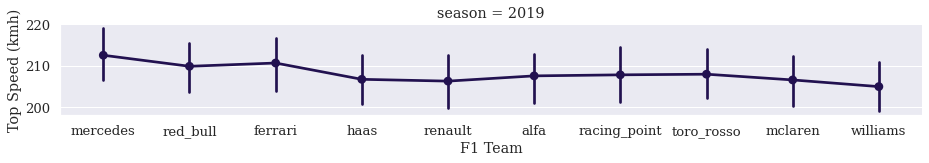

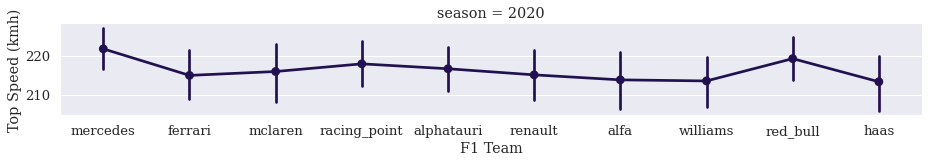

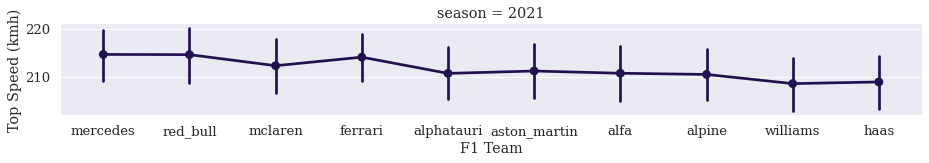

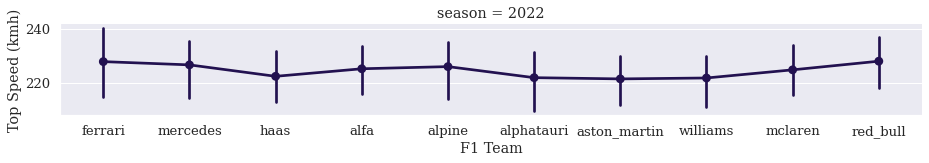

In [22]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")


#Plot
for i in Years:
    if i<=2010:
        continue
    else:
        g = sns.catplot(x='Constructor.constructorId', y='FastestLap.AverageSpeed.speed',
        col="season",kind="point",col_wrap=3,height=2.5,aspect=5,
                data=ResultsDF[ResultsDF["season"]==i])
        plt.xlabel("F1 Team")
        plt.ylabel("Top Speed (kmh)")

plt.show()


##### Fastest lap comparison between circuits (2021)

This analysis was done using last 2021 as reference. The fastest circuit in 2021 was the Red Bull Ring and the slowest, Baku.

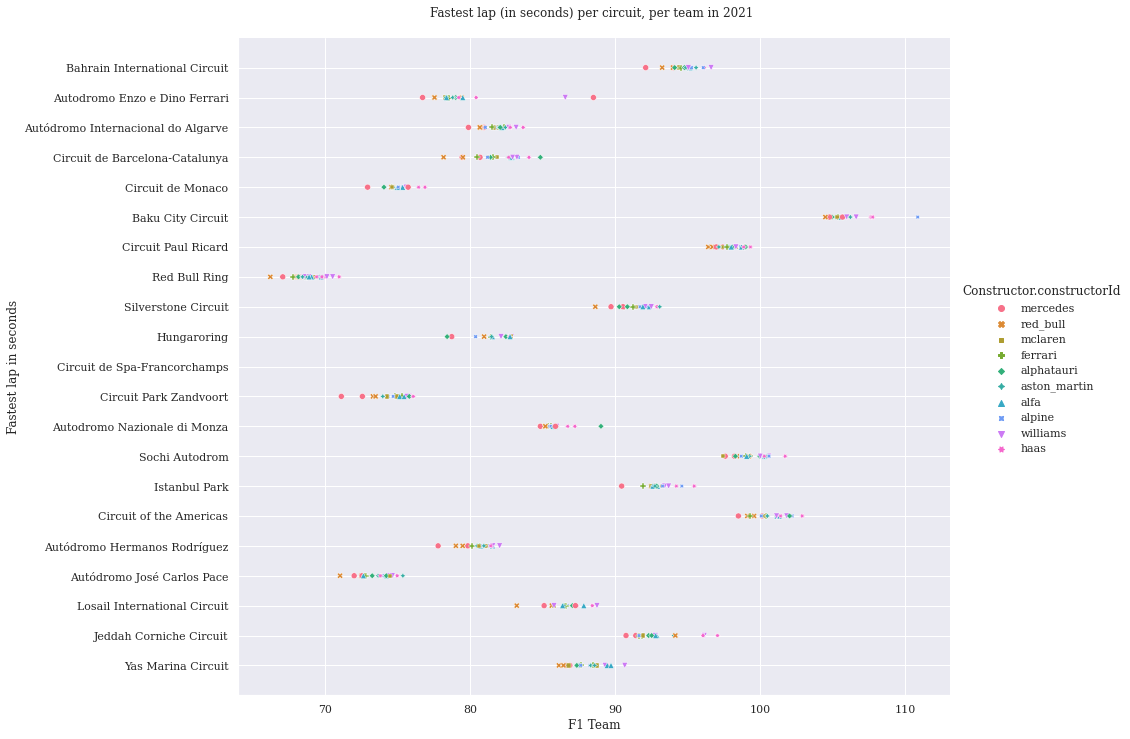

In [23]:
sns.set_theme(style="darkgrid", palette="magma",font_scale=1,font="serif")

g = sns.relplot(x="FastestLap.Time.time_in_seconds", y='Circuit.circuitName',hue='Constructor.constructorId',height=10,aspect=1.4,
        style='Constructor.constructorId',data=ResultsDF[ResultsDF["season"]==2021])
plt.title("Fastest lap (in seconds) per circuit, per team in 2021 \n")
plt.xlabel("F1 Team")
plt.ylabel("Fastest lap in seconds")


plt.show()


#### B. Number of wins and points and other statistics for drivers and teams

In [24]:
#Datasets created for the analysis
PositionsPerDriver=pd.DataFrame({'Number' : ResultsDF[ResultsDF['position']<=3].groupby(['position',"Driver.driverId","season"])['position'].count()}).reset_index()
PositionsPerTeam=pd.DataFrame({'Number' : ResultsDF[ResultsDF['position']<=3].groupby(['position','Constructor.constructorId',"season"])['position'].count()}).reset_index()
GridPerDriver=pd.DataFrame({'Number' : ResultsDF[(ResultsDF['grid']==1) | (ResultsDF['grid']==2)].groupby(['grid',"Driver.driverId","season"])['position'].count()}).reset_index()
GridPerTeam=pd.DataFrame({'Number' : ResultsDF[(ResultsDF['grid']==1) | (ResultsDF['grid']==2)].groupby(['grid','Constructor.constructorId',"season"])['position'].count()}).reset_index()


##### Final positions in the podium per driver (2017-2021)

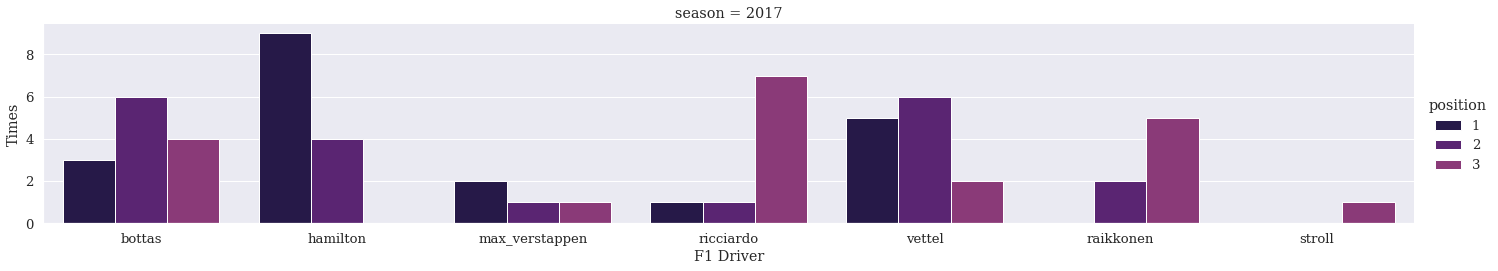

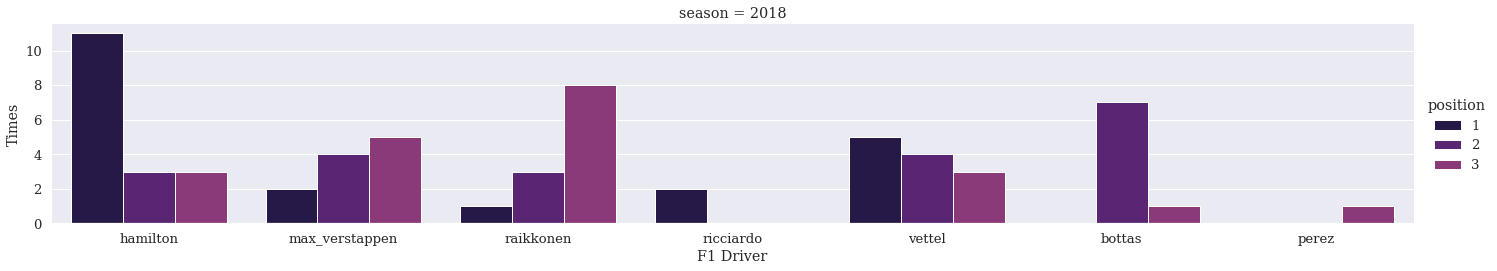

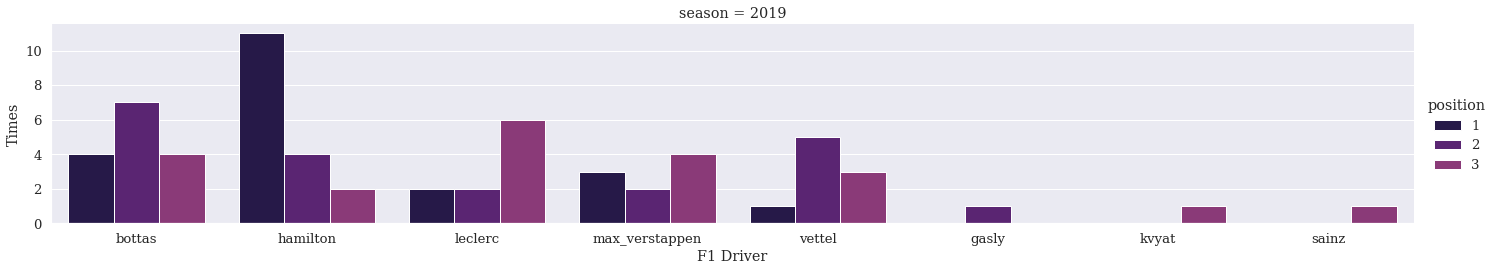

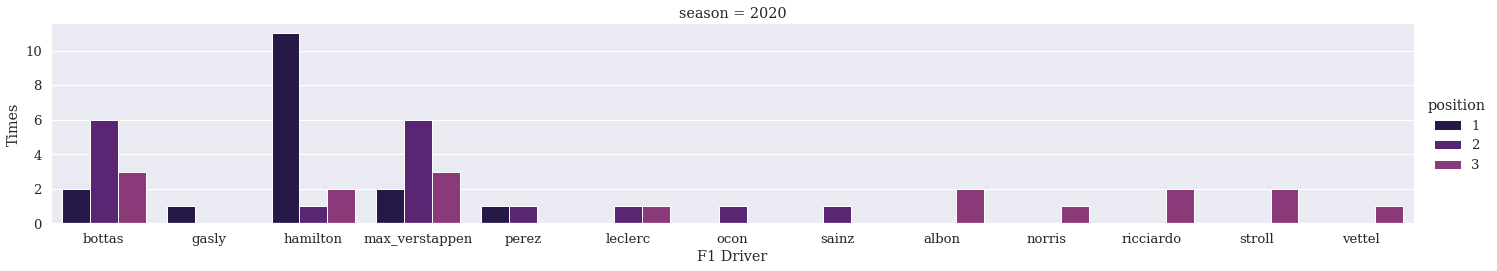

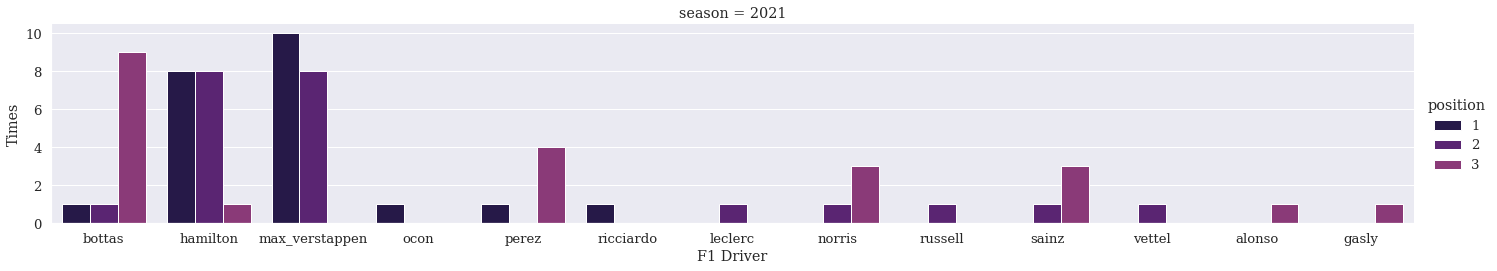

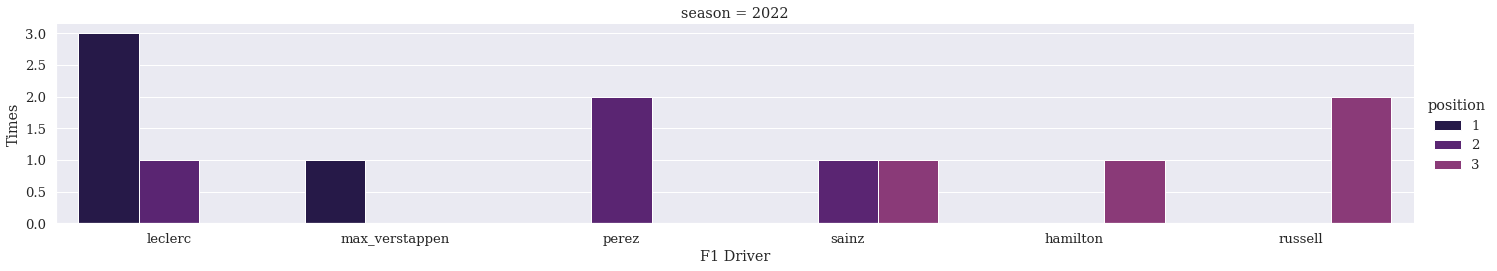

In [25]:
#Ending in top 3 and counting how many times in each position per driver
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Driver.driverId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="position",
            data=PositionsPerDriver[PositionsPerDriver["season"]==i])
        plt.xlabel("F1 Driver")
        plt.ylabel("Times")

plt.show()

##### Final positions in the podium per team (2017-2021)

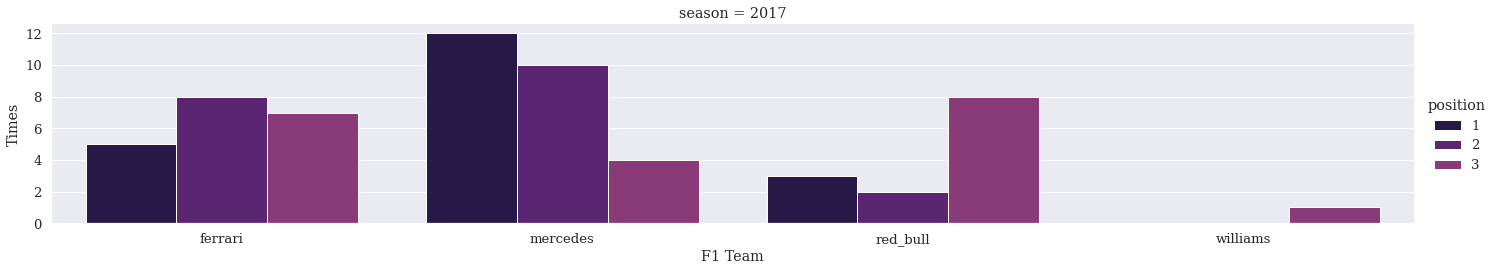

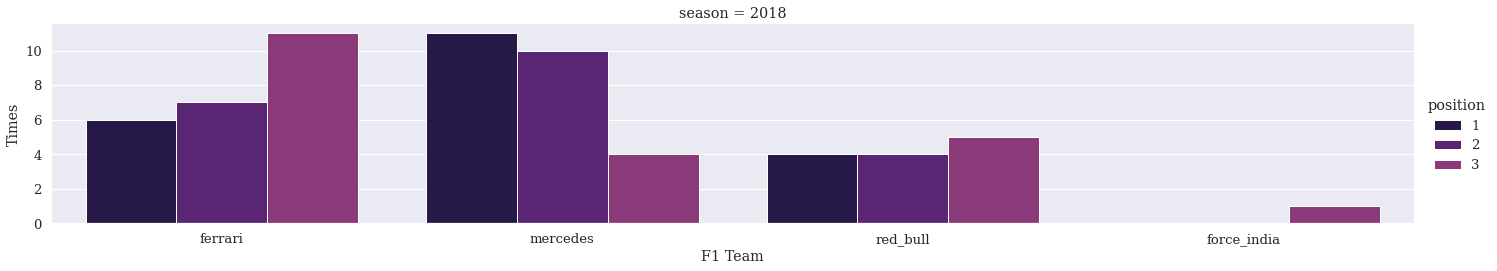

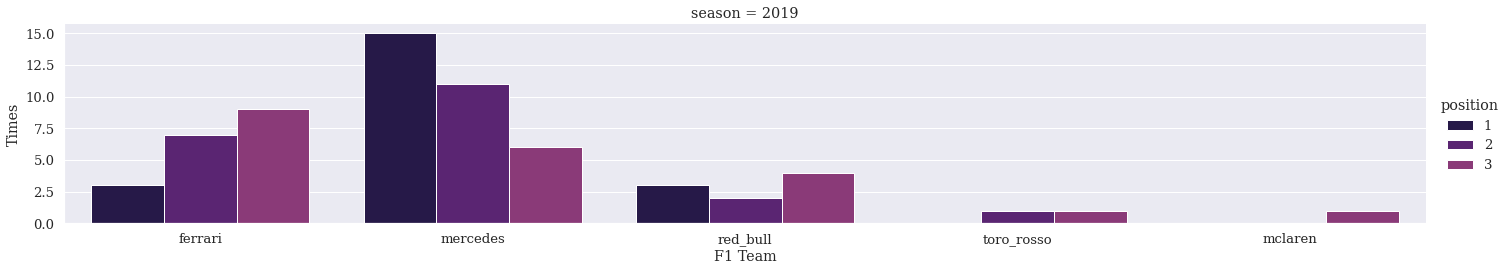

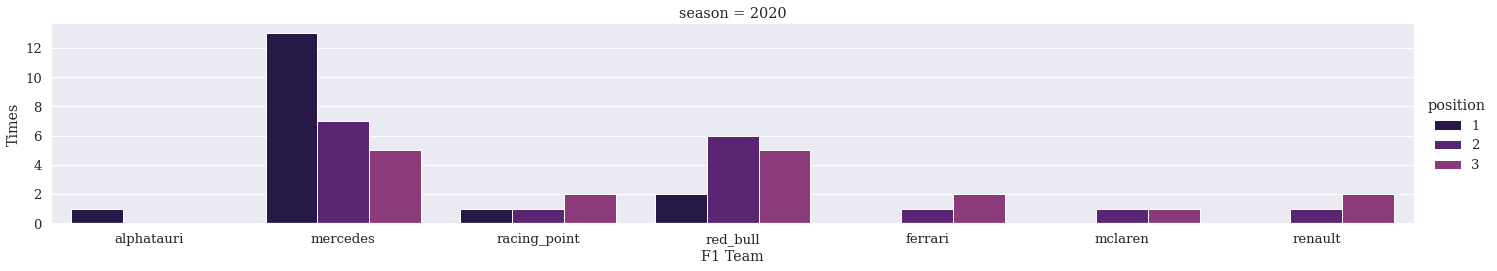

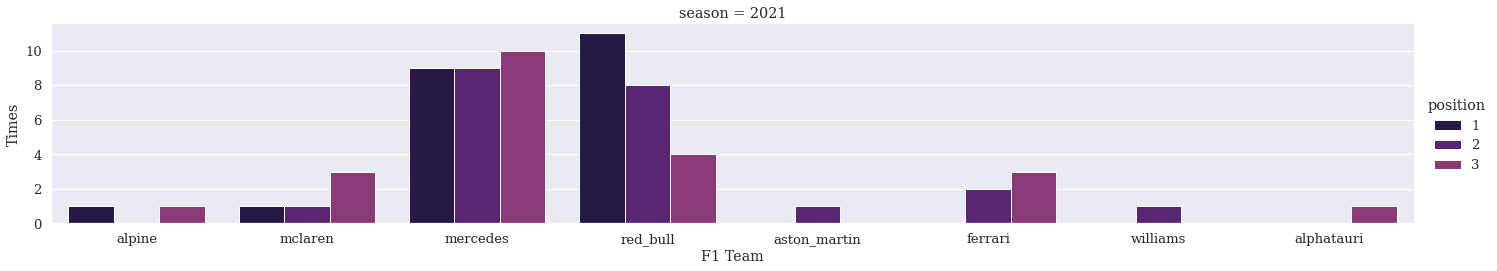

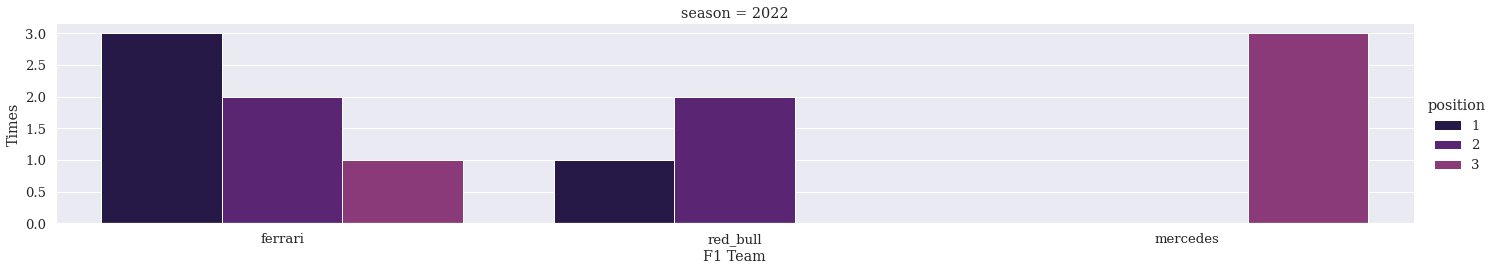

In [26]:
#Ending in top 3 and counting how many times in each position per driver
sns.set_theme(style="darkgrid", palette="magma",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Constructor.constructorId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="position",
            data=PositionsPerTeam[PositionsPerTeam["season"]==i])
        plt.xlabel("F1 Team")
        plt.ylabel("Times")


plt.show()

##### Starting the race in front row per driver (2017-2021)

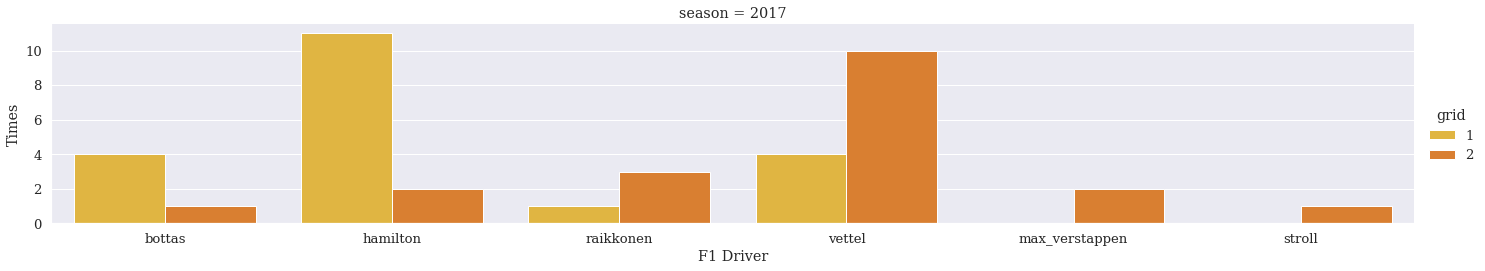

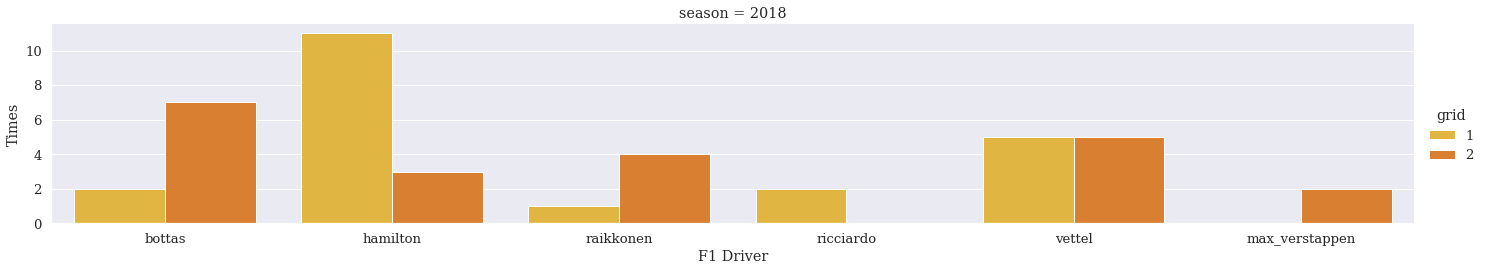

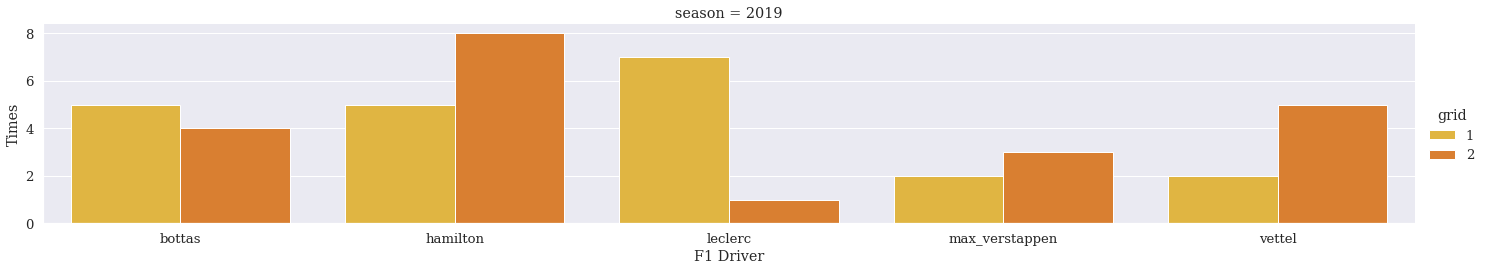

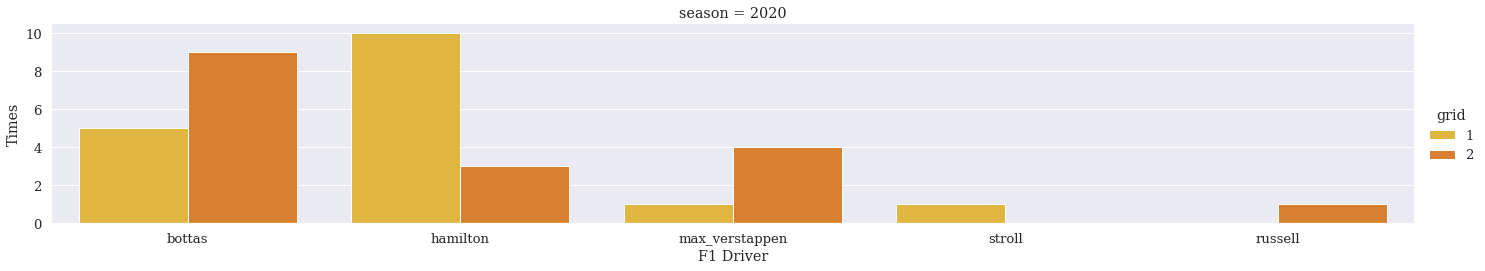

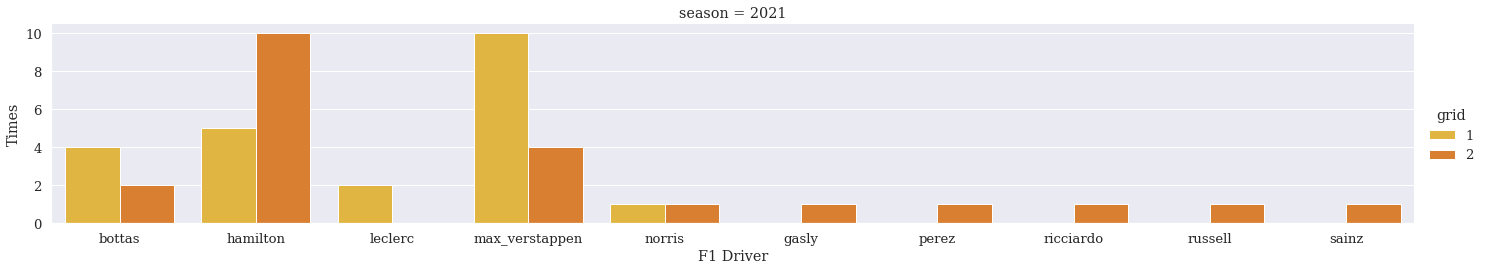

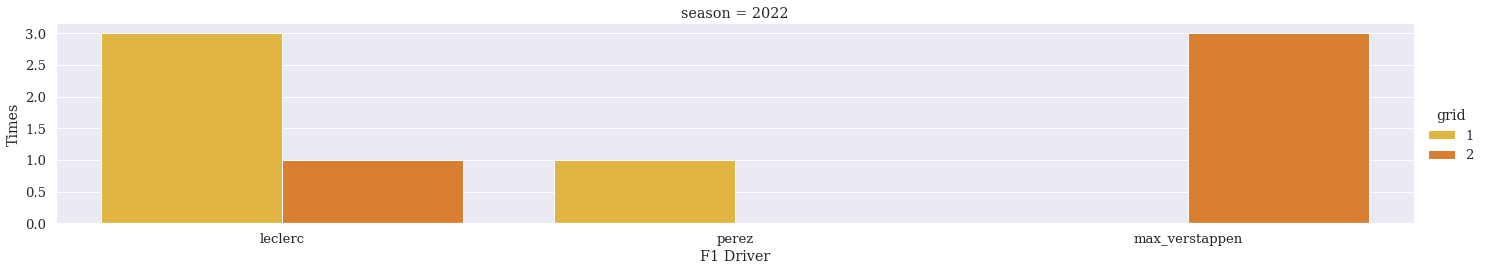

In [27]:
#Front position per driver
sns.set_theme(style="darkgrid", palette="inferno_r",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Driver.driverId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="grid",
            data=GridPerDriver[GridPerDriver["season"]==i])
        plt.xlabel("F1 Driver")
        plt.ylabel("Times")

plt.show()

##### Starting the race in front row per team (2017-2021)

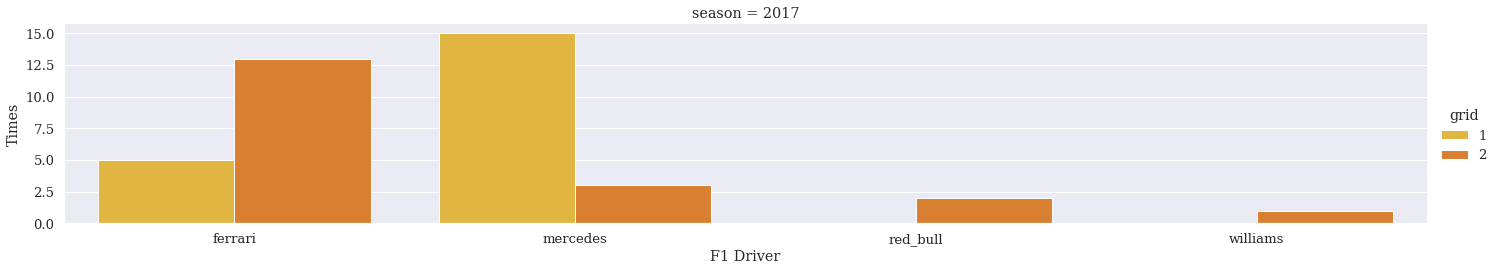

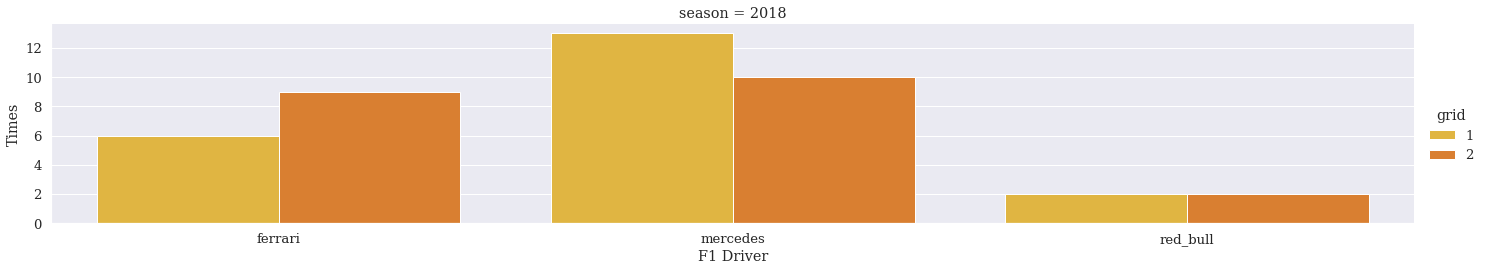

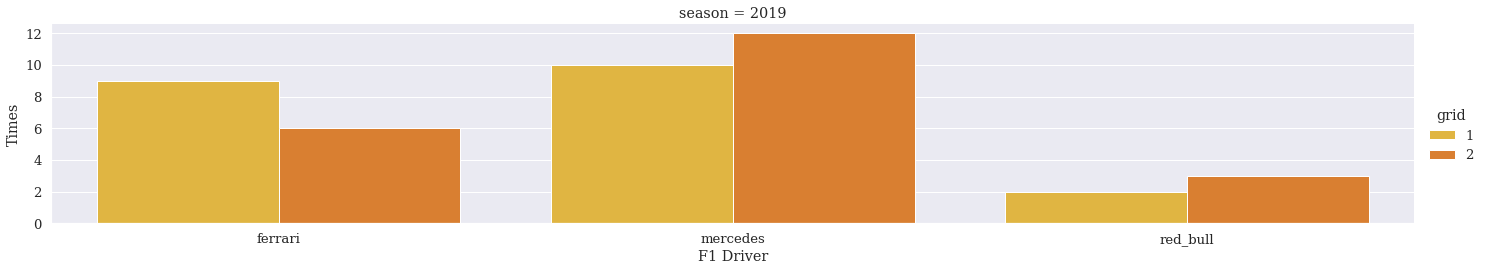

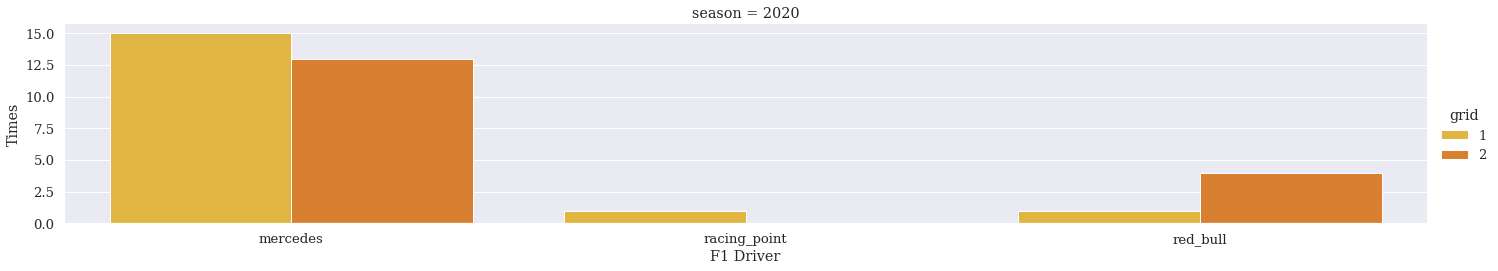

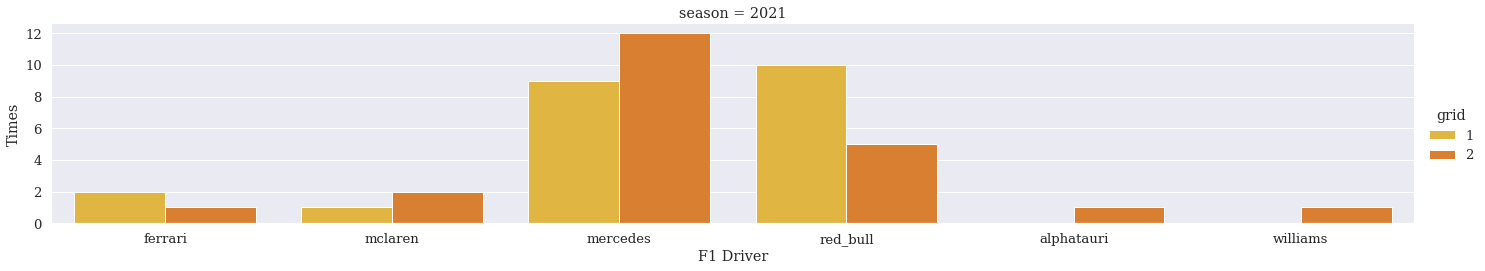

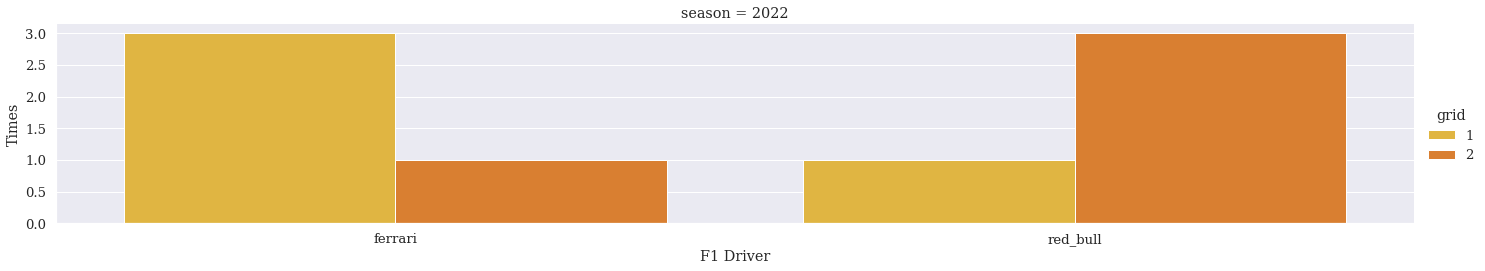

In [28]:
#Front position per driver
sns.set_theme(style="darkgrid", palette="inferno_r",font_scale=1.2,font="serif")

#Plot
for i in Years:
    if i<=2016:
        continue
    else:
        g = sns.catplot(x='Constructor.constructorId',y="Number", col="season",kind="bar",height=4,aspect=5,hue="grid",
            data=GridPerTeam[GridPerTeam["season"]==i])
        plt.xlabel("F1 Driver")
        plt.ylabel("Times")

plt.show()

In [29]:
ResultsDF.columns
ResultsDF['grid'].unique()

array([11,  3, 15,  1, 12,  4, 10,  9,  6,  8, 20, 13, 18,  5,  7, 19, 14,
       16, 17,  2, 22, 21,  0, 23, 24], dtype=int64)

### IV. Data PreProcessing (Part 2)

In [30]:
#Filling rows that does not have pit stops with 0's
Laps_Pits_Results['stop_duration_in_seconds'].fillna(0,inplace=True)
Laps_Pits_Results['stop_number'].fillna(0,inplace=True)

In [31]:
#Filling rows where there is not fastest lap. This happens because the car retired or crashed before making a lap
Laps_Pits_Results['FastestLap.lap'].fillna(0,inplace=True)
Laps_Pits_Results['FastestLap.Time.time_in_seconds'].fillna(0,inplace=True)
Laps_Pits_Results['FastestLap.AverageSpeed.speed'].fillna(0,inplace=True)

In [32]:
#Adding Column for lap_duration_predicted
#it will be the predicted info only in the laps we predicted
Laps_Pits_Results['lap_duration_in_seconds_predicted']=Laps_Pits_Results['lap_duration_in_seconds'].copy(deep=True)

In [33]:
#Taking second half from season 2021 to predict  from Laps_Pits_Results #12054
ToPredict=Laps_Pits_Results[(Laps_Pits_Results["season"]==2021) & (Laps_Pits_Results["round"]>=12)]

#To train and test (all but the ones used to predict) #210721
ToTrainAndTest1=Laps_Pits_Results[Laps_Pits_Results["season"]<2021]
ToTrainAndTest2=Laps_Pits_Results[(Laps_Pits_Results["season"]==2021) & (Laps_Pits_Results["round"]<12)]
ToTrainAndTest=pd.concat([ToTrainAndTest1,ToTrainAndTest2])


In [34]:
def numlapstopredict(df,percentile): #Function to split laps #percentage is the amount to want to use to train
    total_laps_in_race=df["LapNumber"].unique()
    selected=int(np.quantile(total_laps_in_race,percentile))
    PredictTrain=df[df["LapNumber"]<=selected]
    PredictTest=df[df["LapNumber"]>selected]
    return PredictTrain, PredictTest

In [35]:
#Function to split into test and train
#The percentile indicates until what percentile of race laps we want to take info to train. The remaining is the % of laps we want to test

def split_races_laps(df,percentile):
    sr=np.random.choice(df["Season-Round"].to_numpy())

    #Season and Race selected:
    sr_season=df[df["Season-Round"]==sr]["season"].unique()[0]
    sr_round=df[df["Season-Round"]==sr]["round"].unique()[0]

    #Final Split df= df previous years + df same year previous races + df same race previous rounds
    df_previous_years=df[df["season"]<sr_season]
    df_same_year_previous_races=df[(df["season"]==sr_season) & (df["round"]<sr_round)]
    df_specific_race=df[(df["season"]==sr_season) & (df["round"]==sr_round)]

    total_laps_in_race=df_specific_race["LapNumber"].unique()
    selected=int(np.quantile(total_laps_in_race,percentile))
    df_race_before_laps=df_specific_race[df_specific_race["LapNumber"]<=selected]
    df_race_after_laps=df_specific_race[df_specific_race["LapNumber"]>selected]

    #Concatenate df's
    ToTrain=pd.concat([df_previous_years,df_same_year_previous_races,df_race_before_laps])
    ToTest=df_race_after_laps #only one race #Some laps

    print("Season and round selected:",sr)
    #print("\n Num rows previous races: ",df_previous_years["Season-Round"].unique())
    #print("\n Same year",df_same_year_previous_races["Season-Round"].unique())
    print("\n Same race, laps to train: ",df_race_before_laps["LapNumber"].unique())
    print("\n Same race, laps to test: ",df_race_after_laps["LapNumber"].unique())
    
    return ToTest, ToTrain

In [36]:
#Function to split into test and train

def split_races(df):
    sr=np.random.choice(df["Season-Round"].to_numpy())

    #Season and Race selected:
    sr_season=df[df["Season-Round"]==sr]["season"].unique()[0]
    sr_round=df[df["Season-Round"]==sr]["round"].unique()[0]

    #Final Split df= df previous years + df same year previous races + df same race previous rounds
    df_previous_years=df[df["season"]<sr_season]
    df_same_year_previous_races=df[(df["season"]==sr_season) & (df["round"]<sr_round)]
    df_specific_race=df[(df["season"]==sr_season) & (df["round"]==sr_round)]

    #Concatenate df's
    ToTrain=pd.concat([df_previous_years,df_same_year_previous_races])
    ToTest=df_specific_race #only one race #Some laps

    print("Season and round selected:",sr)
    #print("\n Num rows previous races: ",df_previous_years["Season-Round"].unique())
    #print("\n Same year",df_same_year_previous_races["Season-Round"].unique())
    
    return ToTest, ToTrain

### V. Random Forest Regression

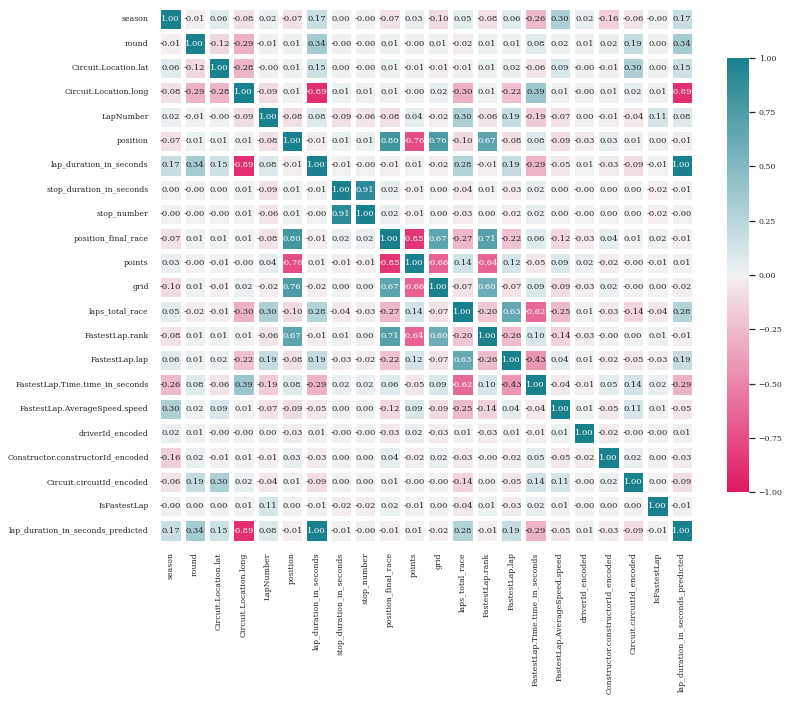

In [37]:
#Calculating correlation: Heatmap
sns.set_theme(style="whitegrid", palette="magma",font_scale=0.7,font="serif")
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(0, 210, 95, 49, as_cmap=True)
sns.heatmap(Laps_Pits_Results.corr(), annot=True, fmt=".2f", 
           linewidths=5,cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)

plt.show()

In [38]:
ToTrainAndTest.columns

Index(['season', 'round', 'raceName', 'date', 'Circuit.circuitId',
       'Circuit.url', 'Circuit.circuitName', 'Circuit.Location.lat',
       'Circuit.Location.long', 'Circuit.Location.locality',
       'Circuit.Location.country', 'LapNumber', 'driverId', 'position',
       'LapDuration', 'lap_duration_in_seconds', 'stop_time',
       'stop_duration_in_seconds', 'stop_number', 'position_final_race',
       'points', 'grid', 'laps_total_race', 'status', 'Driver.nationality',
       'Constructor.constructorId', 'Constructor.nationality', 'Season-Round',
       'FastestLap.rank', 'FastestLap.lap', 'FastestLap.Time.time_in_seconds',
       'FastestLap.AverageSpeed.units', 'FastestLap.AverageSpeed.speed',
       'driverId_encoded', 'Constructor.constructorId_encoded',
       'Circuit.circuitId_encoded', 'IsFastestLap',
       'lap_duration_in_seconds_predicted'],
      dtype='object')

In [39]:
ToTest, ToTrain=split_races_laps(ToTrainAndTest,0.70)

independent=['season','round','Circuit.circuitId_encoded','LapNumber','driverId_encoded','position',
            'stop_duration_in_seconds','stop_number','grid','laps_total_race','Constructor.constructorId_encoded']

dependent='lap_duration_in_seconds'

X_train=ToTrain[independent]
X_test=ToTest[independent]

y_train=ToTrain[dependent]
y_test=ToTest[dependent]


Season and round selected: 2017-12

 Same race, laps to train:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

 Same race, laps to test:  [32 33 34 35 36 37 38 39 40 41 42 43 44]


In [40]:
import sklearn

from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

#r2 score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("r2 score: ",r2_score(y_test, y_pred)) #for all drivers
print("mean squared error: ",mean_squared_error(y_test, y_pred))


r2 score:  1.0
mean squared error:  0.0


In [41]:
#Checking if it predicted who won
ToTest['lap_duration_in_seconds_predicted']=y_pred.tolist()

print("Real")
print(ToTest[ToTest["status"]=="Finished"].groupby(['driverId'])['lap_duration_in_seconds'].sum().sort_values(ascending=True).head(5))

print("\n Predicted")
print(ToTest[ToTest["status"]=="Finished"].groupby(['driverId'])['lap_duration_in_seconds_predicted'].sum().sort_values(ascending=True).head(5))

Real
driverId
bottas        9360.0
ericsson      9360.0
grosjean      9360.0
hamilton      9360.0
hulkenberg    9360.0
Name: lap_duration_in_seconds, dtype: float64

 Predicted
driverId
bottas        9360.0
ericsson      9360.0
grosjean      9360.0
hamilton      9360.0
hulkenberg    9360.0
Name: lap_duration_in_seconds_predicted, dtype: float64


### VI. Random Forest Classifier

In [42]:
ResultsExpandedDF=createResultsExpanded(0.70,25) #percentile #number of previous laps information
#ResultsExpandedDF.columns

In [43]:

ToTest, ToTrain=split_races(ResultsExpandedDF)


independent=['season','round','Circuit.circuitId_encoded','driverId_encoded','grid','laps_total_race','Constructor.constructorId_encoded','Fastest_per_driver', 'Fastest_per_race',
       'laps_considered', 'lap_1_duration_secs', 'position_1',
       'lap_2_duration_secs', 'position_2', 'lap_3_duration_secs',
       'position_3', 'lap_4_duration_secs', 'position_4',
       'lap_5_duration_secs', 'position_5', 'lap_6_duration_secs',
       'position_6', 'lap_7_duration_secs', 'position_7',
       'lap_8_duration_secs', 'position_8', 'lap_9_duration_secs',
       'position_9', 'lap_10_duration_secs', 'position_10',
       'lap_11_duration_secs', 'position_11', 'lap_12_duration_secs',
       'position_12', 'lap_13_duration_secs', 'position_13',
       'lap_14_duration_secs', 'position_14', 'lap_15_duration_secs',
       'position_15', 'lap_16_duration_secs', 'position_16',
       'lap_17_duration_secs', 'position_17', 'lap_18_duration_secs',
       'position_18', 'lap_19_duration_secs', 'position_19',
       'lap_20_duration_secs', 'position_20', 'lap_21_duration_secs',
       'position_21', 'lap_22_duration_secs', 'position_22',
       'lap_23_duration_secs', 'position_23', 'lap_24_duration_secs',
       'position_24', 'lap_25_duration_secs', 'position_25']

dependent='position_final_race'

X_train=ToTrain[independent]
X_test=ToTest[independent]

y_train=ToTrain[dependent]
y_test=ToTest[dependent]

Season and round selected: 2018-17


In [44]:
import sklearn

from sklearn.ensemble import RandomForestClassifier

regressor=RandomForestClassifier(n_estimators=300)
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)

#r2 score
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy (all positions):",metrics.accuracy_score(y_test, y_pred))

result = pd.concat([ToTest[['Season-Round',"driverId","position_final_race"]].reset_index(), pd.DataFrame(y_pred, columns = ['Predicted Final Position'])], axis=1)

print("\n Top 5 positions real vs predicted")
result.head(5)


Accuracy (all positions): 0.2631578947368421

 Top 5 positions real vs predicted


,index,Season-Round,driverId,position_final_race,Predicted Final Position
0,2865,2018-17,hamilton,1,1
1,2866,2018-17,bottas,2,2
2,2867,2018-17,max_verstappen,3,3
3,2868,2018-17,ricciardo,4,4
4,2869,2018-17,raikkonen,5,5


to do:
1rfr: try with less porcentage of laps graphs of results. it can be the 5 ones that have less duration comparison of how it was and how it was predicted
2predict just the pit stops
3predict just the fastest lap